In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# get the data and split it for training and test datasets
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [3]:
train_x.shape

(60000, 28, 28)

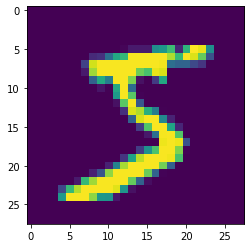

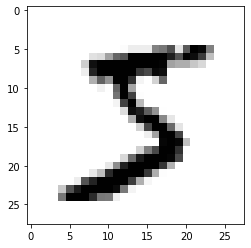

In [4]:
plt.imshow(train_x[0])
plt.show() #to check if its a color image or a binary image
plt.imshow(train_x[0], cmap = plt.cm.binary)

## Checking the values of each pixel
# before Normalization

In [5]:
print(train_x[0]) #beofre normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## As images are in Gray Level (1 channel ==> 0 to 255), not colored (RGB)
# Normalizing the data | Pre-processing step

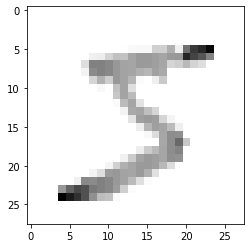

In [6]:
train_x = tf.keras.utils.normalize(train_x, axis = 1)
test_x = tf.keras.utils.normalize(test_x, axis=1)
plt.imshow(train_x[0], cmap = plt.cm.binary)

# After Normalization

In [7]:
print(train_x[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
print (train_y[0]) #to checkif the labels are there

5


## Resizing images to make it suitable for applying convolution operation

In [9]:
IMG_SIZE=28
rtrain_x= np.array(train_x).reshape(-1, IMG_SIZE, IMG_SIZE,1) #increasing one dimension for kernel operation
rtest_x= np.array(test_x).reshape(-1, IMG_SIZE, IMG_SIZE,1) #increasing one dimension for kernel operation
print ("Training sample dimension", rtrain_x.shape)
print ("Testing sample dimension", rtest_x.shape)

Training sample dimension (60000, 28, 28, 1)
Testing sample dimension (10000, 28, 28, 1)


# Creating the Deep Neural Network
## Training on 60,000 samples of MNIST handwritten dataset

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [11]:
#creatig the neural network
model = Sequential()

#First convolution layer
model.add(Conv2D(64,(3,3), input_shape = rtrain_x.shape[1:])) #only for first convolutional layer to input layer size
model.add(Activation("relu")) #activation function to make it non - linear
model.add(MaxPooling2D(pool_size=(2,2))) #maxpooling single maximum value of 2x2 matrix

model.add(Conv2D(64,(3,3))) #2nd convolution layer
model.add(Activation("relu")) #activation function
model.add(MaxPooling2D(pool_size=(2,2))) #maxpooling

model.add(Conv2D(64,(3,3))) #3rd convolution layer
model.add(Activation("relu")) #activation function
model.add(MaxPooling2D(pool_size=(2,2))) #maxpooling

## Fully connected Layer 1, 20x20= 400
model.add(Flatten()) #faltten before using fully connected layer, 2D to 1D.
model.add(Dense(64))
model.add(Activation("relu"))
          
## Fully connected layer 2
model.add(Dense (32))
model.add(Activation("relu"))
          
#Last fully connected layer, output must be equal to the number of classes, 10 (0-9)
model.add(Dense(10)) #this last dense layer must be equal to 10. connects all the layers together
model.add(Activation('softmax')) # for classification


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [13]:
model.compile(loss ="sparse_categorical_crossentropy", optimizer ="adam", metrics=['accuracy'])

In [14]:
model.fit(rtrain_x,train_y,epochs=5, validation_split =0.3, batch_size =1)

Epoch 1/5
42000/42000 [==============================] - 4636s 110ms/step - loss: 0.2444 - accuracy: 0.9259 - val_loss: 0.1054 - val_accuracy: 0.9687
Epoch 2/5
42000/42000 [==============================] - 122s 3ms/step - loss: 0.1232 - accuracy: 0.9664 - val_loss: 0.1757 - val_accuracy: 0.9541
Epoch 3/5
42000/42000 [==============================] - 136s 3ms/step - loss: 0.1091 - accuracy: 0.9711 - val_loss: 0.1267 - val_accuracy: 0.9748
Epoch 4/5
42000/42000 [==============================] - 142s 3ms/step - loss: 0.1001 - accuracy: 0.9746 - val_loss: 0.1245 - val_accuracy: 0.9696
Epoch 5/5
42000/42000 [==============================] - 169s 4ms/step - loss: 0.1026 - accuracy: 0.9754 - val_loss: 0.1420 - val_accuracy: 0.9715


In [15]:
#evaluating on testing data
test_loss, test_acc = model.evaluate(rtest_x,test_y, batch_size=1)
print("Test loss on 10,000 test samples",test_loss)
print("validation accuracy on 10,000 test samples",test_acc)

10000/10000 [==============================] - 18s 2ms/step - loss: 0.1460 - accuracy: 0.9719 0s - loss: 0.1468 
Test loss on 10,000 test samples 0.1459580957889557
validation accuracy on 10,000 test samples 0.9718999862670898


In [16]:
predictions = model.predict([rtest_x])

In [17]:
print (predictions)

[[6.3079475e-26 8.5949076e-13 2.3670816e-12 ... 1.0000000e+00
  8.6020138e-23 5.1997414e-08]
 [7.4628435e-24 1.7276003e-16 1.0000000e+00 ... 3.5849649e-15
  1.4783793e-13 4.3528390e-24]
 [2.0023320e-16 1.0000000e+00 4.1672007e-18 ... 1.1852765e-21
  1.2921793e-12 2.0739062e-17]
 ...
 [6.3906307e-20 7.2278204e-19 1.9091007e-13 ... 6.5431025e-09
  6.3901013e-14 8.4947098e-09]
 [2.0637882e-25 2.0958436e-22 2.8927426e-25 ... 2.2108872e-34
  9.7292000e-14 6.8183567e-19]
 [6.0466201e-15 1.1503211e-23 1.1886001e-28 ... 0.0000000e+00
  1.2030117e-18 5.8673244e-28]]


In [18]:
print(np.argmax(predictions[0]))

7


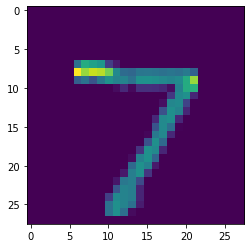

In [19]:
plt.imshow(test_x[0])

In [20]:
print(np.argmax(predictions[700]))

1


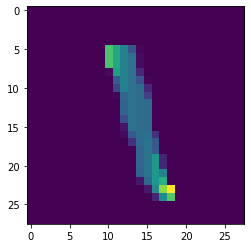

In [21]:
plt.imshow(test_x[700])

In [22]:
model.save('digitss_model')

INFO:tensorflow:Assets written to: digitss_model\assets
